# Questions

- [X] What reading times that get most engament?

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [15]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('medium-data-science-articles-2021.csv')


df.shape
#df.head()

(47660, 10)

# Preparing data

## Find url duplicateds values and drop it

As same Url means same articles, let's remove it.

In [16]:
print(f' We have {df.url.duplicated().sum()} duplicated values in url colum')
df[df.url.duplicated(keep=False)]

 We have 1 duplicated values in url colum


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
24526,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,"<strong class=""markup--strong markup--h3-strong""><em class=""markup--em markup--h3-em"">I’m a Data Scientist — Here’s why I work at Facebook</em></strong>",veronikabelokhvostova,https://medium.com/@veronikabelokhvostova,NaN,591.0,0.0,7.0,Data Science,2021-10-07
25593,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,Facebook destroyed my family andmy mother and grandfather.,lexahe3185,https://medium.com/@lexahe3185,NaN,0.0,0.0,0.0,Data Science,2021-10-12


In [17]:
# I analysed the values and conclude that the correct duplicated values 
#is aways the first! So let's keep it.

df = df.drop_duplicates(subset=['url'], keep='first')
print(f' We have {df.url.duplicated().sum()} duplicated values in url column')
df.shape

 We have 0 duplicated values in url column


(47659, 10)

## Modeling Data

### Extracting reading_time clap means


In [18]:
#Build a python dict of dicts, that contains raw infos about reading time
dict_reading_time = {}

for reading_time, clap in zip(df.reading_time, df.claps):
    if reading_time in dict_reading_time.keys():
        dict_reading_time[reading_time]['total_claps'] += clap
        dict_reading_time[reading_time]['count'] += 1
    else:
        dict_reading_time[reading_time] = {
            'total_claps' : clap,
            'count': 1
        }
#dict_reading_time

In [19]:
#Extract calps means for all reading times
for x in dict_reading_time.values():
    x['clap_mean'] = x['total_claps']/ x['count']
    
#dict_reading_time

## Analyse data

In order to eleiminate outlyers we will only analise reading times that apper 5 or more times!

In [20]:
df_reading_time = pd.DataFrame(dict_reading_time).transpose()
df_reading_time = df_reading_time[df_reading_time['count'] >= 15]
df_reading_time.head()

,total_claps,count,clap_mean
5.0,338601.0,6510.0,52.012442
3.0,240990.0,7525.0,32.025249
6.0,310961.0,4781.0,65.040996
2.0,144597.0,5521.0,26.190364
1.0,31837.0,3483.0,9.140683


Text(0, 0.5, 'Clap Means')

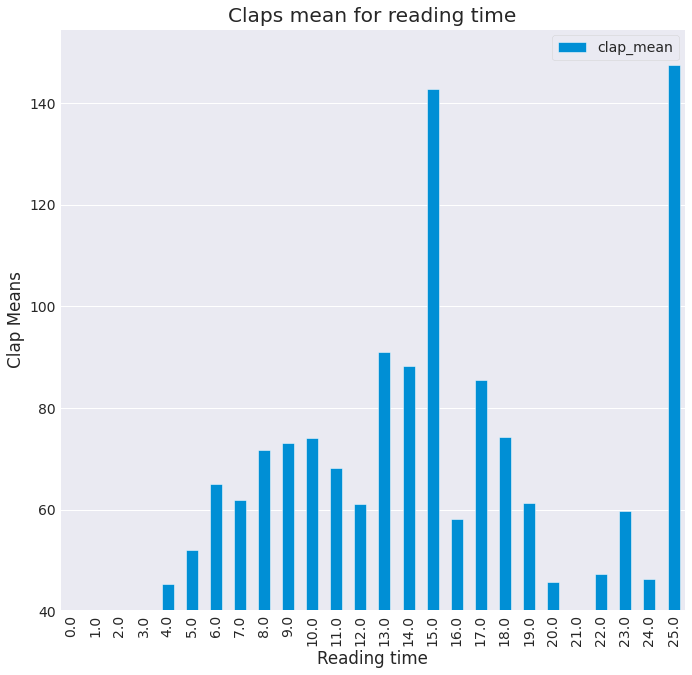

In [21]:
matplotlib.style.use('fivethirtyeight') 

sns.set_style("dark")
df_reading_time.sort_index(ascending=True).plot.bar(y='clap_mean')

plt.ylim(bottom=40)

plt.grid(True, axis='y')
plt.title("Claps mean for reading time")
plt.xlabel("Reading time")
plt.ylabel("Clap Means")